In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Display information about the dataset
print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))
print("Shape of an image in the dataset:", X_test[0].shape)

Number of training samples: 60000
Number of testing samples: 10000
Shape of an image in the dataset: (28, 28)


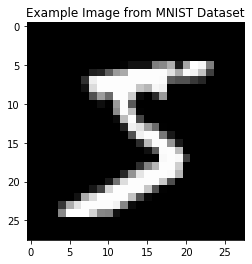

In [4]:
# Display an example image from the training set
plt.imshow(X_train[0], cmap='gray')
plt.title("Example Image from MNIST Dataset")
plt.show()

In [5]:
# Display the class of the example image
print("Digit class:", y_train[0])

Digit class: 5


In [6]:
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
Y_train = np_utils.to_categorical(y_train, 10)  # 10 classes to codify
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
# Reshape the input tensors
traintensor = X_train.reshape(len(X_train), 28, 28, 1)
testtensor = X_test.reshape(len(X_test), 28, 28, 1)

# Define model parameters
img_rows = 28
img_cols = 28
kernel_size = 3
pool_size = 2

In [8]:
# Build the CNN model
model = Sequential()
model.add(Convolution2D(16, (kernel_size, kernel_size), padding='valid', input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [9]:
# Train the model
model_history = model.fit(
    traintensor,
    Y_train,
    batch_size=128,
    epochs=20,
    verbose=2,
    validation_data=(testtensor, Y_test)
)

Epoch 1/20
469/469 - 11s - loss: 0.3886 - accuracy: 0.8817 - val_loss: 0.1085 - val_accuracy: 0.9692 - 11s/epoch - 22ms/step
Epoch 2/20
469/469 - 10s - loss: 0.1572 - accuracy: 0.9534 - val_loss: 0.0741 - val_accuracy: 0.9775 - 10s/epoch - 21ms/step
Epoch 3/20
469/469 - 10s - loss: 0.1195 - accuracy: 0.9645 - val_loss: 0.0591 - val_accuracy: 0.9815 - 10s/epoch - 22ms/step
Epoch 4/20
469/469 - 11s - loss: 0.1025 - accuracy: 0.9690 - val_loss: 0.0523 - val_accuracy: 0.9824 - 11s/epoch - 22ms/step
Epoch 5/20
469/469 - 10s - loss: 0.0895 - accuracy: 0.9729 - val_loss: 0.0480 - val_accuracy: 0.9833 - 10s/epoch - 21ms/step
Epoch 6/20
469/469 - 10s - loss: 0.0808 - accuracy: 0.9746 - val_loss: 0.0431 - val_accuracy: 0.9855 - 10s/epoch - 21ms/step
Epoch 7/20
469/469 - 10s - loss: 0.0749 - accuracy: 0.9766 - val_loss: 0.0408 - val_accuracy: 0.9858 - 10s/epoch - 21ms/step
Epoch 8/20
469/469 - 10s - loss: 0.0666 - accuracy: 0.9790 - val_loss: 0.0403 - val_accuracy: 0.9867 - 10s/epoch - 21ms/step


In [10]:
# Evaluate the model
score = model.evaluate(testtensor, Y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9911
Test loss: 0.03362766280770302
Test accuracy: 0.991100013256073


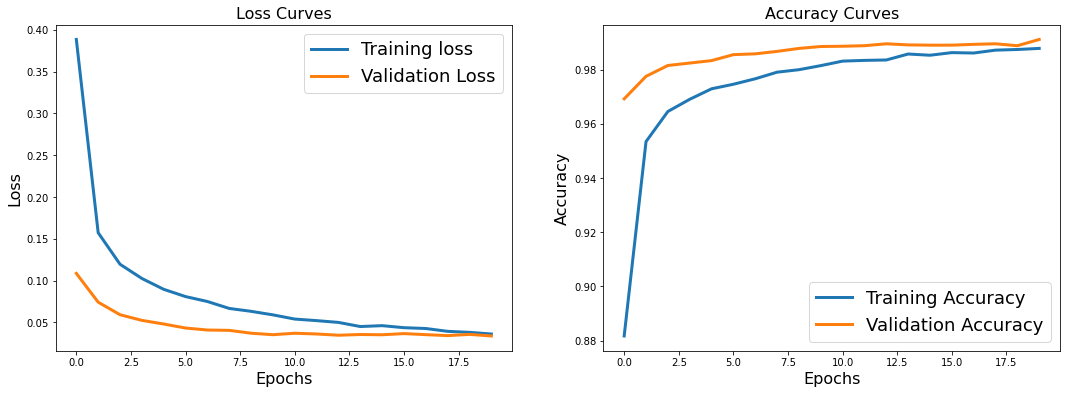

In [11]:
# Plotting the training history
plt.figure(figsize=(18, 6))

# Loss Curves
plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], linewidth=3.0)
plt.plot(model_history.history['val_loss'], linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], linewidth=3.0)
plt.plot(model_history.history['val_accuracy'], linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [12]:
# Save the trained model
model.save('digit_recognition_model_MNIST.h5')